<a href="https://colab.research.google.com/github/ucaokylong/GenAI-project/blob/main/VAE_application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autoencoder

Autoencoder (AE) là một mô hình học sâu không giám sát, được thiết kế để học cách mã hóa và tái tạo lại dữ liệu đầu vào. Mô hình này có mục tiêu chính là giảm chiều dữ liệu và nén thông tin sao cho các đặc trưng quan trọng của dữ liệu vẫn được bảo tồn trong một không gian ẩn (*latent space*). AE hoạt động trên nguyên lý học biểu diễn của dữ liệu đầu vào và tái tạo lại dữ liệu từ biểu diễn này với sai số tối thiểu.

## Kiến trúc của mô hình Autoencoder
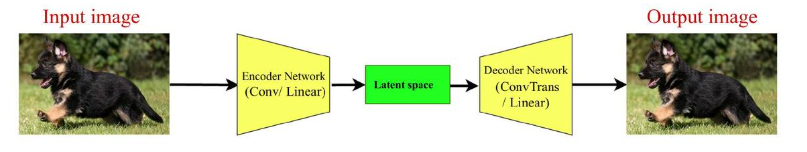


Hình 2: Kiến trúc của mô hình Autoencoder

## Mô hình AE bao gồm ba phần chính:

- **Encoder**:
  - Phần encoder có nhiệm vụ chuyển đổi dữ liệu đầu vào $x \in \mathbb{R}^n$ thành một biểu diễn ở không gian ẩn $z \in \mathbb{R}^q$, với $q \ll n$.
  - Quá trình này thực hiện việc nén dữ liệu, giảm chiều của dữ liệu gốc nhằm giữ lại những đặc trưng quan trọng nhất.
  - Việc chuyển đổi này giúp mô hình tập trung vào các đặc trưng quan trọng của dữ liệu, loại bỏ những thông tin không cần thiết và tạo ra một biểu diễn gọn gàng hơn.

- **Bottleneck (Latent Space)**:
  - Không gian ẩn là một không gian có kích thước nhỏ hơn so với đầu vào của mô hình, nơi mô hình lưu trữ các đặc trưng cốt lõi của dữ liệu.
  - Không gian này đóng vai trò quan trọng trong việc nén và biểu diễn thông tin của dữ liệu.
  - Khi kích thước của không gian ẩn càng nhỏ, thông tin được lưu trữ trong *latent space* càng trở nên quan trọng và giúp tránh được vấn đề overfitting khi model phải chọn lọc các thông tin quan trọng để lưu trữ.

- **Decoder**:
  - Phần decoder nhận đầu vào là các đặc trưng từ không gian ẩn và tái tạo lại dữ liệu đầu vào ban đầu.
  - Mục tiêu của decoder là khôi phục dữ liệu gốc một cách chính xác nhất có thể, với sai số nhỏ nhất so với dữ liệu ban đầu. Quá trình này đóng vai trò quan trọng trong việc tái tạo thông tin từ biểu diễn ở khoongg gian ẩn, đồng thời giúp mô hình hiểu rõ hơn về các đặc trưng đã được mã hóa trong quá trình encoder.

## Loss Function trong Autoencoder

Hàm mất mát (*Loss function*) trong Autoencoder (AE) được thiết kế để đo sai số giữa dữ liệu gốc và dữ liệu tái tạo, đóng vai trò là mục tiêu tối ưu hóa của mô hình. Mục đích chính của AE là học cách mã hóa và giải mã dữ liệu sao cho dữ liệu được tái tạo giống với dữ liệu gốc nhất có thể. Để đạt được mục tiêu này, AE sử dụng *Reconstruction loss* để hướng dẫn mô hình tối ưu hóa việc tái tạo dữ liệu. Hai hàm mất mát phổ biến nhất trong AE là **Mean Squared Error (MSE)** và **Binary Cross-Entropy (BCE)**.

### Mean Squared Error (MSE)

MSE được sử dụng khi dữ liệu đầu vào là các giá trị liên tục, ví dụ như grayscale hay ảnh RGB có pixel là các giá trị thực. Công thức của MSE được định nghĩa như sau:

$$
L_{MSE} = \frac{1}{M} \sum_{i=1}^{M} \frac{1}{N} \sum_{j=1}^{N} (x_{j,i} - \hat{x}_{j,i})^2
$$

Trong đó:

- $M$: Là số mẫu trong batch.
- $N$: Là số chiều của dữ liệu.
- $x_{j,i}$: Là giá trị tại pixel $j$ của mẫu $i$.
- $\hat{x}_{j,i}$: Là giá trị tái tạo tương ứng.

---

### Binary Cross-Entropy (BCE)

BCE được sử dụng khi dữ liệu đầu vào là các giá trị nhị phân hoặc đã chuẩn hóa về khoảng [0, 1], ví dụ như ảnh đen trắng. Công thức của BCE như sau:

$$
L_{BCE} = \frac{1}{M} \sum_{i=1}^{M} \frac{1}{N} \sum_{j=1}^{N} [x_{j,i} \log \hat{x}_{j,i} + (1 - x_{j,i}) \log(1 - \hat{x}_{j,i})]
$$

Trong đó:

- $x_{j,i}$: Là giá trị tại pixel $j$ của mẫu $i$.
- $\hat{x}_{j,i}$: Là giá trị tái tạo pixel của chính mẫu đó.

---

### Ứng dụng Reconstruction Loss trong AE

AE được ứng dụng phổ biến trong nén dữ liệu, khử nhiễu, và giảm chiều dữ liệu. Dữ liệu đầu vào (ví dụ: ảnh, văn bản) được mã hóa thành biểu diễn ẩn (*latent space*) để giảm kích thước mà vẫn giữ được thông tin quan trọng trước khi truyền đi. Sau đó bộ giải mã (*decoder*) sẽ nhận khôi phục dữ liệu gần giống với bản gốc, giúp tiết kiệm bộ nhớ và tăng tốc độ xử lý.

Tuy có nhiều lợi ích nhưng AE có một hạn chế lớn đó là việc không gian tiềm ẩn (*latent space*) không có cấu trúc xác suất, nghĩa là mô hình chỉ tối ưu hóa *reconstruction loss* mà không đảm bảo rằng không gian ẩn có tính liên tục và đầy đủ. Điều này có thể dẫn đến việc các điểm dữ liệu tương tự có thể bị ánh xạ đến các vị trí xa nhau trong không gian ẩn.

---

### Variational Autoencoder (VAE)

Để khắc phục vấn đề này, **Variational Autoencoder (VAE)** đã được đề xuất. VAE không chỉ có khả năng tái tạo dữ liệu mà còn mô hình hóa không gian tiềm ẩn như một phân phối xác suất liên tục. Điều này được thực hiện bằng cách thêm thành phần *KL-divergence loss* nhằm đảm bảo phân phối ẩn của dữ liệu được điều chỉnh theo một phân phối chuẩn (thường là phân phối Gaussian).

Nhờ đó, VAE có thể sinh ra dữ liệu mới bằng cách lấy mẫu từ không gian tiềm ẩn đã học, mở ra nhiều ứng dụng trong AI tổng hợp như tạo ảnh, tổng hợp giọng nói hay mô phỏng dữ liệu.


## Variational Autoencoder (VAE)

Variational Autoencoder (VAE) là một mô hình học sâu sinh (*generative deep learning model*) được thiết kế để học các biểu diễn tiềm ẩn (*latent representations*) của dữ liệu một cách không giám sát. Không giống như các phương pháp giảm chiều đơn thuần, VAE học một không gian tiềm ẩn có cấu trúc và có thể lấy mẫu để tạo ra dữ liệu mới tương tự như dữ liệu huấn luyện. VAE kết hợp các kỹ thuật từ suy luận biến phân (*variational inference*) và mạng nơ-ron sâu (*deep neural networks*) để tối ưu hóa không gian ẩn. Thay vì chỉ ánh xạ dữ liệu đầu vào thành một vector cố định, VAE ánh xạ dữ liệu vào một phân phối xác suất, cho phép sinh ra các dữ liệu mới từ không gian tiềm ẩn theo một cách có kiểm soát.

---



---

### Các thành phần chính trong VAE

#### **1. Encoder (Parametric Encoder)**

Encoder trong VAE tương tự như AE nhưng có một số khác biệt quan trọng trong cách hoạt động và cấu trúc của không gian ẩn:

- **Tạo vector**: Thay vì tạo ra một vector mã hóa đơn lẻ như AE, encoder trong VAE tạo ra hai vector: trung bình (*mean, μ*) và vector độ lệch chuẩn (*variance, σ*).
- **Phân phối Gaussian**: Mô hình sau đó sử dụng hai vector này để xác định phân phối Gaussian.

---

#### **2. Latent Space (Probabilistic Latent Space)**

VAE không có một "bottleneck" cố định như AE. Thay vào đó, mô hình ép buộc các biểu diễn trong không gian ẩn phải tuân theo một phân phối xác suất cụ thể. Điều này có tác dụng điều chuẩn (*regularization*), tạo cấu trúc và tính liên tục cho không gian ẩn.

---

#### **3. Reparameterization Trick**

Để huấn luyện mô hình VAE bằng *gradient descent*, cần phải lấy mẫu từ phân phối xác suất được xác định bởi encoder. Tuy nhiên, thao tác lấy mẫu là không khả vi (*non-differentiable*). Để giải quyết vấn đề này, VAE sử dụng một kỹ thuật gọi là "reparameterization trick":

$$
z = \mu + \sigma \odot \epsilon
$$

Trong đó:

- $z$: Là điểm ngẫu nhiên lấy mẫu từ một phân phối xác định.
- $\mu$: Là vector trung bình.
- $\sigma$: Là vector độ lệch chuẩn.
- $\epsilon$: Là biến ngẫu nhiên độc lập, được lấy từ phân phối chuẩn Gaussian.

Kỹ thuật này cho phép biểu diễn biến ngẫu nhiên $z$ như một hàm khả vi của các tham số encoder và một biến ngẫu nhiên độc lập, sau đó được truyền cho decoder.

---

#### **4. Decoder**

Decoder nhận một mẫu từ không gian ẩn $z$ và tái tạo lại dữ liệu đầu vào ban đầu, tương tự như trong AE.

---

### Hàm mất mát của VAE

Hàm mất mát (*Loss function*) của VAE bao gồm hai thành phần chính:

1. **Reconstruction Loss**: Đo sai số giữa dữ liệu gốc và dữ liệu tái tạo.
2. **Regularization Loss**: Đảm bảo không gian tiềm ẩn có cấu trúc và liên tục.

VAE khác biệt với AE với việc có thêm thành phần *Regularization Loss* để đảm bảo không gian tiềm ẩn có cấu trúc và liên tục. Điều này cho phép VAE tạo ra các mẫu dữ liệu mới từ mô hình đã học.


## Evidence Lower Bound (ELBO) trong Variational Autoencoder (VAE)

Công thức tổng thể của hàm mất mát trong VAE được gọi là **Evidence Lower Bound (ELBO)**:

$$
L(\theta, \phi) = \mathbb{E}_{q_{\phi}(z|x)} [\log p_{\theta}(x|z)] - KL(q_{\phi}(z|x) || p(z))
$$

---

### Ý nghĩa các thành phần trong công thức:

- **$\phi$**: Các tham số của encoder.
- **$\theta$**: Các tham số của decoder.

#### Thành phần 1: Reconstruction Loss
- **$\mathbb{E}_{q_{\phi}(z|x)} [\log p_{\theta}(x|z)]$**: Là *Reconstruction Loss* của VAE, đo lường khả năng tái tạo dữ liệu $x$ từ các mẫu $z$ được lấy từ phân phối tiềm ẩn $q_{\phi}(z|x)$.  
Khác với Reconstruction Loss của Autoencoder (AE), VAE tính giá trị trung bình của log-likelihood $\log p_{\theta}(x|z)$ trên phân phối $q_{\phi}(z|x)$. Điều này cho phép tích hợp bất định tính của $z$ trong quá trình tái tạo, từ đó mô hình không chỉ cố gắng khôi phục lại $x$ mà còn phản ánh được xác suất sinh ra ở nhiều khả năng khác nhau của $z$.

---

#### Thành phần 2: Regularization Loss (KL Divergence)
- **$KL(q_{\phi}(z|x) || p(z))$**: Là *Regularization Loss*, đo lường sự khác biệt giữa phân phối hậu nghiệm (*posterior*) $q_{\phi}(z|x)$ (do encoder ước tính) và phân phối tiên nghiệm (*prior*) $p(z)$ (thường sử dụng Gaussian chuẩn).  
Regularization Loss đảm bảo rằng không gian tiềm ẩn có cấu trúc liên tục và có tính tổng quát cao, giúp VAE sinh ra các mẫu dữ liệu mới từ không gian này một cách hiệu quả. Đây là điểm khác biệt chính so với AE, vì AE không cố thành phần điều chuẩn này, dẫn đến không gian tiềm ẩn của AE thường thiếu cấu trúc rõ ràng.

---

### Ứng dụng của VAE

VAE được sử dụng rộng rãi trong nhiều lĩnh vực như:
- **Tạo dữ liệu tổng hợp**: Chẳng hạn như hình ảnh, video hoặc văn bản, dựa trên các mẫu đã học từ dữ liệu huấn luyện.
- **Ứng dụng sáng tạo**: Ví dụ như tạo hình ảnh phong cách nghệ thuật, nội dung video mới hoặc tổng hợp văn bản tự nhiên trong chatbot.
- **Phát hiện bất thường**: VAE có thể được dùng để phát hiện lỗi hoặc gian lận trong dữ liệu.

---

### Hạn chế của VAE

Mặc dù mạnh mẽ, VAE vẫn có một số hạn chế đáng chú ý:
1. **Chất lượng tái tạo thấp**: Hình ảnh được tạo ra thường bị mờ.
2. **Sự đánh đổi giữa Reconstruction Loss và KL Divergence**:
   - Hai thành phần này thường trái ngược nhau, dẫn đến sự đánh đổi (*trade-off*) khiến kết quả tái tạo không sắc nét như các mô hình khác như GAN.
   - Chính điều này khiến GAN trở thành lựa chọn phổ biến hơn trong nhiều ứng dụng tạo hình ảnh.

3. **Khả năng kiểm soát không gian tiềm ẩn**:
   - VAE thiếu cơ chế áp đặt ràng buộc lên dữ liệu tiềm ẩn, khiến việc kiểm soát chất lượng dữ liệu sinh ra trở nên khó khăn.

---

### Các biến thể của VAE

Một số biến thể nổi bật nhằm khắc phục hạn chế bao gồm:
- **Conditional VAE (CVAE)**.
- **Beta-VAE (B-VAE)**.
- **Vector Quantized VAE (VQ-VAE)**.

Các biến thể này cải thiện chất lượng hình ảnh và kiểm soát tốt hơn không gian tiềm ẩn.


In [1]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import torch.nn.functional as F
from tqdm import tqdm
from torchsummary import summary
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, random_split

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [3]:
#Hyperparameters
batch_size = 256
img_size = 28
channels = 1
latent_dim = 2


transform = transforms.Compose([
    transforms.Resize((img_size, img_size)),
    transforms.ToTensor(),
])

dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

100%|██████████| 9.91M/9.91M [00:00<00:00, 18.1MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 495kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.47MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.65MB/s]


In [4]:
#Slpit dataset into training (80%) and validation (20%)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
print(f"Training samples: {len(train_dataset)}")
print(f"Validation samples: {len(val_dataset)}")

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers = 2)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers = 2)

Training samples: 48000
Validation samples: 12000


In [5]:
# Define the Variational Autoencoder (VAE) in PyTorch
class VAE(nn.Module):
    def __init__(self, channels, latent_dim):
        super(VAE, self).__init__()

        # Encoder
        self.conv1 = nn.Conv2d(channels, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1)

        self.flatten_dim = 64 * 7 * 7
        self.fc_mu = nn.Linear(self.flatten_dim, latent_dim)
        self.fc_logvar = nn.Linear(self.flatten_dim, latent_dim)

        # Decoder
        self.fc_decode = nn.Linear(latent_dim, self.flatten_dim)
        self.deconv1 = nn.ConvTranspose2d(64, 32, kernel_size=3, stride=2, padding=1, output_padding=1)
        self.deconv2 = nn.ConvTranspose2d(32, 16, kernel_size=3, stride=2, padding=1, output_padding=1)
        self.conv_final = nn.Conv2d(16, channels, kernel_size=3, padding=1)

    def encode(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = x.view(-1, self.flatten_dim)
        mu = self.fc_mu(x)
        logvar = self.fc_logvar(x)
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        x = F.relu(self.fc_decode(z))
        x = x.view(-1, 64, 7, 7)
        x = F.relu(self.deconv1(x))
        x = F.relu(self.deconv2(x))
        x = torch.sigmoid(self.conv_final(x))
        return x

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        recon_x = self.decode(z)
        return recon_x, mu, logvar


In [18]:
def loss_function(recon_x, x, mu, logvar, B=1000):
    # Flatten tensors for MSE calculation
    recon_x_flat = recon_x.view(recon_x.size(0), -1)
    x_flat = x.view(x.size(0), -1)

    # Calculate MSE (per element average)
    mse_out = F.mse_loss(recon_x_flat, x_flat, reduction='mean')

    # Scale by input dimensions
    reconstruction_loss = mse_out * x.shape[1] * x.shape[2] * x.shape[3]

    # Calculate KL divergence
    kl_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp(), axis=-1)

    # Compute final loss (adding B*recon_loss + kl_loss)
    total_loss = B * reconstruction_loss + torch.mean(kl_loss)

    return total_loss, reconstruction_loss, torch.mean(kl_loss)



In [19]:
# Create model, optimizer, etc.
model = VAE(channels, latent_dim).to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)

In [20]:
import os
from datetime import datetime
num_epochs = 200

# Tạo thư mục log nếu nó chưa tồn tại
log_dir = "logs"
os.makedirs(log_dir, exist_ok=True)

# Tạo tệp log với dấu thời gian
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
log_file = os.path.join(log_dir, f"training_log_{timestamp}.txt")

# Mở tệp log
with open(log_file, "w") as f:
    f.write(f"Training started at {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
    f.write(f"Model: VAE with latent dim={latent_dim}\n")
    f.write(f"Batch size: {batch_size}, Image size: {img_size}x{img_size}\n")
    f.write(f"Total epochs: {num_epochs}\n\n")
    f.write("Epoch, Avg_Loss, Recon_Loss, KL_Loss\n")

# Vòng lặp huấn luyện với ghi log
model.train()
for epoch in range(num_epochs):
    train_loss = 0.0
    epoch_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", leave=False)
    for data, _ in epoch_bar:
        data = data.to(device)
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(data)

        loss, recon_loss, kl_loss = loss_function(recon_batch, data, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
        epoch_bar.set_postfix(loss=loss.item())
    # print(f"mu: {mu}")
    # print(f"logvar: {logvar}")

    # Tính toán lỗi trung bình
    avg_loss = train_loss / len(train_loader.dataset)

    # In kết quả epoch
    print(f"Epoch {epoch+1}/{num_epochs} Loss per sample: {avg_loss:.4f} "
          f"Recon Loss: {recon_loss.item():.4f} KL Loss: {kl_loss.item():.4f}")

    # Lưu vào tệp log
    with open(log_file, "a") as f:
      f.write("{epoch+1}, {avg_loss:.6f}, {recon_loss.item():.6f}, {kl_loss.item():.6f}\n")


Epoch 1/200 Loss per sample: 343.8788 Recon Loss: 52.8364 KL Loss: 6.8928


Epoch 2/200 Loss per sample: 182.2647 Recon Loss: 44.5236 KL Loss: 9.6088


Epoch 3/200 Loss per sample: 162.6838 Recon Loss: 40.0652 KL Loss: 10.6500


Epoch 4/200 Loss per sample: 151.3480 Recon Loss: 37.1107 KL Loss: 11.0995


Epoch 5/200 Loss per sample: 145.5268 Recon Loss: 35.4517 KL Loss: 12.1183


Epoch 6/200 Loss per sample: 141.9842 Recon Loss: 35.7739 KL Loss: 13.0386


Epoch 7/200 Loss per sample: 139.5992 Recon Loss: 36.3915 KL Loss: 12.1325


Epoch 8/200 Loss per sample: 137.4938 Recon Loss: 34.2091 KL Loss: 13.0353


Epoch 9/200 Loss per sample: 135.7278 Recon Loss: 35.1285 KL Loss: 12.9818


Epoch 10/200 Loss per sample: 134.6777 Recon Loss: 35.3666 KL Loss: 13.3468


Epoch 11/200 Loss per sample: 133.5510 Recon Loss: 33.5631 KL Loss: 13.7545


Epoch 12/200 Loss per sample: 132.7004 Recon Loss: 32.0096 KL Loss: 12.8843


Epoch 13/200 Loss per sample: 131.6115 Recon Loss: 31.1725 KL Loss: 14.2419


Epoch 14/200 Loss per sample: 131.0814 Recon Loss: 34.7942 KL Loss: 12.8119


Epoch 15/200 Loss per sample: 130.3300 Recon Loss: 30.9005 KL Loss: 14.1081


Epoch 16/200 Loss per sample: 129.9902 Recon Loss: 34.9200 KL Loss: 13.3456


Epoch 17/200 Loss per sample: 129.3488 Recon Loss: 33.3829 KL Loss: 13.7467


Epoch 18/200 Loss per sample: 129.1403 Recon Loss: 33.3101 KL Loss: 13.2833


Epoch 19/200 Loss per sample: 128.2966 Recon Loss: 34.5068 KL Loss: 14.1447


Epoch 20/200 Loss per sample: 127.9914 Recon Loss: 31.6513 KL Loss: 14.6789


Epoch 21/200 Loss per sample: 127.5176 Recon Loss: 31.1795 KL Loss: 14.7212


Epoch 22/200 Loss per sample: 127.0099 Recon Loss: 33.5372 KL Loss: 13.4300


Epoch 23/200 Loss per sample: 126.8776 Recon Loss: 33.0243 KL Loss: 14.1572


Epoch 24/200 Loss per sample: 126.3221 Recon Loss: 33.1909 KL Loss: 14.1066


Epoch 25/200 Loss per sample: 126.0670 Recon Loss: 33.5989 KL Loss: 13.9899


Epoch 26/200 Loss per sample: 125.7992 Recon Loss: 34.2213 KL Loss: 13.1844


Epoch 27/200 Loss per sample: 125.4271 Recon Loss: 32.5583 KL Loss: 14.1277


Epoch 28/200 Loss per sample: 125.2529 Recon Loss: 30.3542 KL Loss: 14.4031


Epoch 29/200 Loss per sample: 124.8399 Recon Loss: 31.9015 KL Loss: 13.9273


Epoch 30/200:  97%|█████████▋| 182/188 [00:07<00:00, 28.37it/s, loss=3.15e+4]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7e2e1c776520>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
    if w.is_alive():
       ^^^^^^^^^^^^
  File "/usr/lib/python3.11/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7e2e1c776520>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
    self._shutdown_workers()
  File "/us

Epoch 30/200 Loss per sample: 124.6381 Recon Loss: 30.2079 KL Loss: 14.7829


Epoch 31/200:  89%|████████▉ | 167/188 [00:05<00:00, 28.80it/s, loss=3.25e+4]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7e2e1c776520>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
    Exception ignored in: self._shutdown_workers()
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
<function _MultiProcessingDataLoaderIter.__del__ at 0x7e2e1c776520>
Traceback (most recent call last):
      File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
    if w.is_alive():
self._shutdown_workers()    
   File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
    if w.is_alive():  
^ ^  ^ ^ ^ ^ ^^^^^^^^^^^
^  File "/usr/lib/python3.11/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid =

Epoch 31/200 Loss per sample: 124.3321 Recon Loss: 31.2390 KL Loss: 14.2635


Epoch 32/200:  81%|████████  | 152/188 [00:07<00:01, 28.88it/s, loss=3.13e+4]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7e2e1c776520>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
    Exception ignored in: if w.is_alive():
<function _MultiProcessingDataLoaderIter.__del__ at 0x7e2e1c776520> 
 Traceback (most recent call last):
   File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
      self._shutdown_workers() 
   File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
^    ^if w.is_alive():^
^  ^ ^^^ ^^^^ 
    File "/usr/lib/python3.11/multiprocessing/process.py", line 160, in is_alive
    ^assert self._parent_pid == os.

Epoch 32/200 Loss per sample: 124.3054 Recon Loss: 31.7533 KL Loss: 13.9091


Epoch 33/200:  68%|██████▊   | 128/188 [00:04<00:01, 30.49it/s, loss=3.08e+4]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7e2e1c776520>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
    if w.is_alive():
       Exception ignored in: ^^^<function _MultiProcessingDataLoaderIter.__del__ at 0x7e2e1c776520>^
^Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
    self._shutdown_workers()^^
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
^    ^if w.is_alive():
^ ^ ^ 
   File "/usr/lib/python3.11/multiprocessing/process.py", line 160, in is_alive
      assert self._parent_pid == os.ge

Epoch 33/200 Loss per sample: 123.8749 Recon Loss: 30.2073 KL Loss: 14.0179


Epoch 34/200:  92%|█████████▏| 173/188 [00:08<00:00, 27.94it/s, loss=3.12e+4]
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
    if w.is_alive():
       ^^^^^^^^^^^^
  File "/usr/lib/python3.11/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7e2e1c776520>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1601, in _shut

Epoch 34/200 Loss per sample: 123.8774 Recon Loss: 33.6608 KL Loss: 14.4120


Epoch 35/200:  82%|████████▏ | 155/188 [00:05<00:01, 30.48it/s, loss=3.11e+4]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7e2e1c776520>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
    if w.is_alive():
       ^^^^^^^Exception ignored in: ^^^<function _MultiProcessingDataLoaderIter.__del__ at 0x7e2e1c776520>^
^
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
      File "/usr/lib/python3.11/multiprocessing/process.py", line 160, in is_alive
self._shutdown_workers()    assert self._parent_pid == os.getpid(), 'can only test a child process'

  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1601, in _shut

Epoch 35/200 Loss per sample: 123.6792 Recon Loss: 30.1977 KL Loss: 14.1484


Epoch 36/200:  73%|███████▎  | 138/188 [00:06<00:02, 20.74it/s, loss=3.14e+4]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7e2e1c776520>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
    Exception ignored in: self._shutdown_workers()
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
    <function _MultiProcessingDataLoaderIter.__del__ at 0x7e2e1c776520>
if w.is_alive():Traceback (most recent call last):

  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
       self._shutdown_workers()    
^  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
^^    if w.is_alive():^^
 ^ ^ ^ ^^ ^ ^
   File "/usr/lib/python3.11/multiprocessing/process.py", line 160, in is_alive
^    assert self._parent_pid == os.

Epoch 36/200 Loss per sample: 123.3696 Recon Loss: 30.6011 KL Loss: 14.0633


Epoch 37/200:  65%|██████▍   | 122/188 [00:06<00:03, 19.85it/s, loss=3.15e+4]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7e2e1c776520>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
    if w.is_alive():
       ^^^^^^^^^^^^
  File "/usr/lib/python3.11/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7e2e1c776520>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
    self._shutdown_workers()
  File "/us

Epoch 37/200 Loss per sample: 123.0880 Recon Loss: 29.8186 KL Loss: 14.0081


Epoch 38/200:  90%|████████▉ | 169/188 [00:05<00:00, 31.03it/s, loss=3.1e+4]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7e2e1c776520>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
Epoch 38/200:  90%|████████▉ | 169/188 [00:05<00:00, 31.03it/s, loss=3e+4]  
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
    if w.is_alive():
       ^^^^Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7e2e1c776520>^
^Traceback (most recent call last):
^^^^  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
^^
  File "/usr/lib/python3.11/multiprocessing/process.py", line 160, in is_alive
    self._shutdown_workers()    
assert self._parent_pid == os.getpid(), 'can only test a child process'  File "/usr/local/lib/python3.11/dist-packages/torch/

Epoch 38/200 Loss per sample: 123.0317 Recon Loss: 32.6307 KL Loss: 13.8345


Epoch 39/200:  34%|███▍      | 64/188 [00:02<00:05, 21.83it/s, loss=3.01e+4]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7e2e1c776520>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
Exception ignored in:     <function _MultiProcessingDataLoaderIter.__del__ at 0x7e2e1c776520>
Traceback (most recent call last):
self._shutdown_workers()  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__

  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
        self._shutdown_workers()if w.is_alive():
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
    
 if w.is_alive(): 
            ^^^^^^^^^^^^^^^^^^^^^^^
^  File "/usr/lib/python3.11/multiprocessing/process.py", line 160, in is_alive

      File "/usr/lib/py

Epoch 39/200 Loss per sample: 122.7007 Recon Loss: 31.7483 KL Loss: 14.1480


Epoch 40/200:  32%|███▏      | 61/188 [00:03<00:07, 18.09it/s, loss=3.21e+4]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7e2e1c776520>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
Exception ignored in:     <function _MultiProcessingDataLoaderIter.__del__ at 0x7e2e1c776520>
self._shutdown_workers()
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
    if w.is_alive():    
 self._shutdown_workers()  
   File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
       if w.is_alive():
^ ^^  ^^    ^^^^^^^^^^^^^^^^
^^  File "/usr/lib/python3.11/multiprocessing/process.py", line 160, in is_alive
    ^assert self._parent_

KeyboardInterrupt: 

In [21]:
model.eval()

with torch.no_grad():
    data_iter = iter(val_loader)
    images, _ = next(data_iter)
    images = images.to(device)
    recon_images, _, _ = model(images)

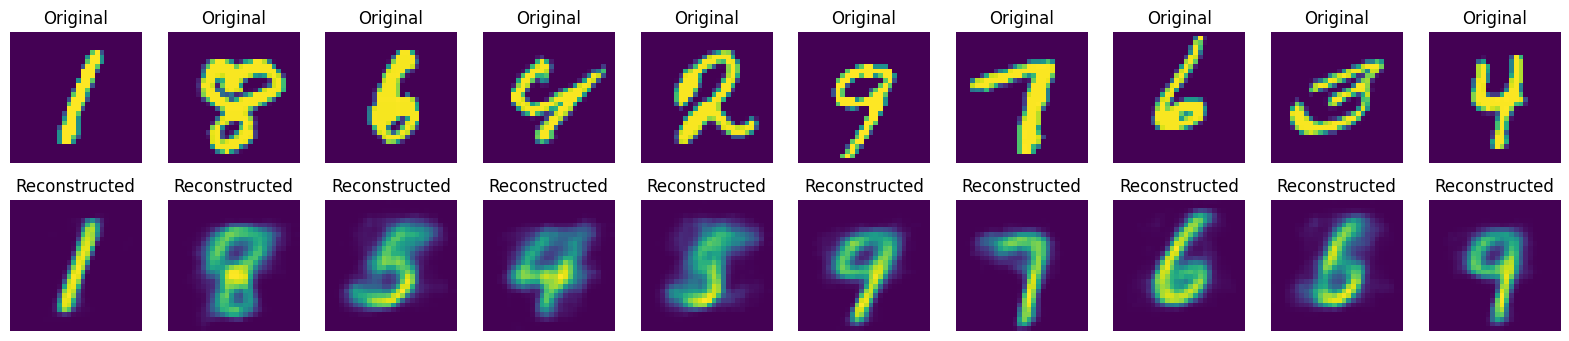

In [22]:
n = 10  # number of images to display
plt.figure(figsize=(20, 4))

for i in range(n):
    # Original image: (C, H, W) -> (H, W, C)
    orig = images[i].cpu().permute(1, 2, 0).numpy()
    recon = recon_images[i].cpu().permute(1, 2, 0).numpy()

    ax = plt.subplot(2, n, i + 1)
    plt.imshow(orig)
    plt.title("Original")
    plt.axis('off')

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(recon)
    plt.title("Reconstructed")
    plt.axis('off')

plt.show()